In [1]:
import pandas as pd
import numpy as np
import string
import re
import matplotlib.pyplot as plt
import seaborn as sns

#1) Google Shopping data cleaning
df = pd.read_csv('/Users/ingrid/Documents/FTDS/project1/google_shopping.csv')
pd.set_option('display.max_rows', None)
pd.set_option('display.max_colwidth', None)
df

,Title,Price,Supplier
0,[新版]惠氏Illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,HK$285.00,泰好批—網絡批發直銷
1,惠氏Illuma 啟賦 4段 3歲以上 850g.,HK$305.00,泰好批 - 網路批發直銷
2,Illuma Luxa Hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,HK$432.00,Watsons Hong Kong
3,原装行貨-惠氏港版ILLUMA LUXA 3號 兒童成長配方奶粉 850g (6罐裝),"HK$1,770.00",Parpee Shop 爬比店
4,ILLUMA HMO初生嬰兒配方奶粉1,HK$538.00,aeoncity.com.hk
5,惠氏Illuma 啟賦 2段 6-12個月 850g.,HK$335.00,泰好批 - 網路批發直銷
6,Illuma-(2021 新包裝) 惠氏 illuma LUXA 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,HK$370.00,HKTVmall - HKTVmall
7,ILLUMA 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,HK$465.00,泰好批—網絡批發直銷
8,Illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,HK$439.00,PARKnSHOP.com
9,Illuma 配方奶粉 - 1號,HK$425.00,Mamy Kingdom


In [2]:
df['Title']=df['Title'].str.lower()

In [3]:
df['Series']=pd.np.where(df.Title.str.contains('luxa'),"Luxa",
                        pd.np.where(df.Title.str.contains('hmo'),"Luxa",
                                   pd.np.where(df.Title.str.contains('有機'),'Organic',
                                               pd.np.where(df.Title.str.contains('organic'),'Organic',
                                                           pd.np.where(df.Title.str.contains('酪蛋白'),'Atwo',
                                                                       pd.np.where(df.Title.str.contains('atwo'),'Atwo',
                                                                                   pd.np.where(df.Title.str.contains('HA'),'HA',
                                                                                               pd.np.where(df.Title.str.contains('新版'),'Luxa',
                                                                                                           pd.np.where(df.Title.str.contains('低敏'),'HA','Luxa')))))))))
            
                                                                                               
df
                         

/var/folders/ll/xgszy52s70d0_805tpwfpz440000gn/T/ipykernel_41187/1625738501.py:1: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  df['Series']=pd.np.where(df.Title.str.contains('luxa'),"Luxa",
/var/folders/ll/xgszy52s70d0_805tpwfpz440000gn/T/ipykernel_41187/1625738501.py:2: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(df.Title.str.contains('hmo'),"Luxa",
/var/folders/ll/xgszy52s70d0_805tpwfpz440000gn/T/ipykernel_41187/1625738501.py:3: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. Import numpy directly instead
  pd.np.where(df.Title.str.contains('有機'),'Organic',
/var/folders/ll/xgszy52s70d0_805tpwfpz440000gn/T/ipykernel_41187/1625738501.py:4: FutureWarning: The pandas.np module is deprecated and will be removed from pandas in a future version. I

,Title,Price,Supplier,Series
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,HK$285.00,泰好批—網絡批發直銷,Luxa
1,惠氏illuma 啟賦 4段 3歲以上 850g.,HK$305.00,泰好批 - 網路批發直銷,Luxa
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,HK$432.00,Watsons Hong Kong,Luxa
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝),"HK$1,770.00",Parpee Shop 爬比店,Luxa
4,illuma hmo初生嬰兒配方奶粉1,HK$538.00,aeoncity.com.hk,Luxa
5,惠氏illuma 啟賦 2段 6-12個月 850g.,HK$335.00,泰好批 - 網路批發直銷,Luxa
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,HK$370.00,HKTVmall - HKTVmall,Luxa
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,HK$465.00,泰好批—網絡批發直銷,Organic
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,HK$439.00,PARKnSHOP.com,Organic
9,illuma 配方奶粉 - 1號,HK$425.00,Mamy Kingdom,Luxa


In [4]:
df["Series"].value_counts()

Luxa       152
Organic     64
Atwo        24
HA          12
Name: Series, dtype: int64

In [5]:
df.groupby('Supplier')['Series'].value_counts()

Supplier              Series 
HKTVmall  - HKTVmall  Luxa       36
                      HA          8
                      Organic     8
                      Atwo        4
HOME+                 Organic     4
Halook 家居個人護理店        Organic    12
LBuy.hk               Organic     4
Mamy Kingdom          Luxa       16
PARKnSHOP.com         Atwo        8
                      Organic     8
                      Luxa        4
Parpee Shop 爬比店       Luxa       16
Watsons Hong Kong     Luxa       12
                      Atwo        4
                      HA          4
Ztore                 Luxa        8
                      Organic     4
aeoncity.com.hk       Luxa       16
                      Organic    12
bnybuy.com 生活百貨       Luxa       12
zalora.com.hk         Luxa        4
天貓香港 Tmall HK         Luxa       16
                      Atwo        8
                      Organic     4
泰好批 - 網路批發直銷          Luxa        8
                      Organic     4
泰好批—網絡批發直銷            Luxa        

In [6]:
df['Can'] = df.Title.str.extract(r'([0-9]\u7f50)',expand=True)
df['Can'] = df["Can"].fillna(1)
df['Can'] = df['Can'].replace({'\u7f50':''},regex=True)
df['Can'] = df['Can'].astype(int)
df['Can']

0      1
1      1
2      1
3      6
4      1
5      1
6      1
7      1
8      1
9      1
10     6
11     1
12     6
13     1
14     1
15     1
16     1
17     1
18     6
19     1
20     1
21     1
22     1
23     1
24     1
25     1
26     1
27     1
28     1
29     1
30     1
31     1
32     1
33     1
34     1
35     1
36     1
37     1
38     1
39     1
40     1
41     1
42     1
43     1
44     1
45     1
46     6
47     1
48     1
49     1
50     1
51     1
52     1
53     1
54     1
55     2
56     1
57     1
58     1
59     1
60     1
61     1
62     1
63     1
64     1
65     1
66     6
67     1
68     1
69     1
70     1
71     1
72     1
73     6
74     1
75     6
76     1
77     1
78     1
79     1
80     1
81     6
82     1
83     1
84     1
85     1
86     1
87     1
88     1
89     1
90     1
91     1
92     1
93     1
94     1
95     1
96     1
97     1
98     1
99     1
100    1
101    1
102    1
103    1
104    1
105    1
106    1
107    1
108    1
109    6
110    1
1

In [7]:
df['Gram'] = df.Title.str.extract(r'([0-9][0-9][0-9]g|[0-9][0-9][0-9]\u514b)',expand=True)
df['Gram'] = df["Gram"].fillna(850)
df['Gram']

0      850g
1      850g
2      850克
3      850g
4       850
5      850g
6      850g
7      900克
8      850克
9       850
10     850g
11     850克
12     850g
13     900克
14     900克
15      850
16     850g
17     850克
18     850g
19      850
20     850g
21     800克
22      850
23      850
24     850g
25      850
26     850g
27     850克
28     850g
29     850g
30     350克
31     850克
32      850
33     900克
34     850g
35     850克
36      850
37      850
38      850
39     850g
40     850克
41     850g
42     850g
43      850
44      850
45     850克
46      850
47     850g
48      850
49     800克
50     850g
51     850g
52     850克
53     850克
54     850克
55     850克
56      850
57     850g
58      850
59     850g
60     850克
61     850克
62     850克
63     850g
64     850g
65     850克
66     850g
67      850
68     850g
69     850g
70     900克
71     850克
72      850
73     850g
74     850克
75     850g
76     900克
77     900克
78      850
79     850g
80     850克
81     850g
82      850
83  

In [8]:
df.drop(index=30,inplace=True)
df.drop(index=93,inplace=True)
df.drop(index=156,inplace=True)
df.drop(index=219,inplace=True)

In [9]:
df['Price'] = df['Price'].replace({'HK\$':''},regex=True)
df['Price'] = df['Price'].transform(''.join).str.replace(',', '').astype(float)
df['Price']

0       285.0
1       305.0
2       432.0
3      1770.0
4       538.0
5       335.0
6       370.0
7       465.0
8       439.0
9       425.0
10     2010.0
11      399.0
12     1770.0
13      458.0
14      449.0
15      559.0
16      410.0
17      489.0
18     2220.0
19      405.0
20      315.0
21      518.0
22      589.0
23      499.9
24      498.0
25      385.0
26      315.0
27      525.0
28      340.0
29      432.0
31      357.0
32      340.0
33      410.0
34      385.0
35      538.0
36      345.0
37      499.0
38      459.9
39      800.0
40      538.0
41      355.0
42      365.0
43      518.0
44      429.9
45      476.0
46     2430.0
47      395.0
48      518.0
49      488.0
50      395.0
51      459.0
52      499.0
53      499.0
54      399.0
55      828.0
56      215.0
57      462.0
58      465.0
59      538.0
60      465.0
61      427.0
62      559.0
63      285.0
64      305.0
65      432.0
66     1770.0
67      538.0
68      335.0
69      370.0
70      465.0
71      439.0
72    

In [10]:
df['Title']=df['Title'].replace(' ','')
df['Title'] =df['Title'].str.strip('\s')
df[['Title']]

,Title
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段
1,惠氏illuma 啟賦 4段 3歲以上 850g.
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝)
4,illuma hmo初生嬰兒配方奶粉1
5,惠氏illuma 啟賦 2段 6-12個月 850g.
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費
9,illuma 配方奶粉 - 1號


In [11]:
df['Stage_7'] = df['Title'].apply(lambda x: 2 if '較大'in x else None)
df['Stage_7'].isnull()

0       True
1       True
2       True
3       True
4       True
5       True
6       True
7       True
8       True
9       True
10      True
11     False
12      True
13     False
14      True
15     False
16      True
17     False
18      True
19      True
20      True
21      True
22      True
23      True
24      True
25      True
26      True
27      True
28      True
29      True
31      True
32      True
33      True
34     False
35      True
36      True
37      True
38     False
39      True
40      True
41      True
42      True
43     False
44      True
45     False
46      True
47     False
48      True
49      True
50     False
51      True
52      True
53      True
54     False
55      True
56     False
57      True
58      True
59      True
60      True
61      True
62     False
63      True
64      True
65      True
66      True
67      True
68      True
69      True
70      True
71      True
72      True
73      True
74     False
75      True
76     False
77      True

In [12]:
df['Stage_1'] = df.Title.str.extract(r'([0-9]\u865f)',expand=True)
df['Stage_2'] = df.Title.str.extract(r'([0-9]\u968e\u6bb5)',expand=True)
df['Stage_3'] = df.Title.str.extract(r'([0-9]\u6bb5)',expand=True)
df['Stage_4'] = df.Title.str.extract(r'(\u5976\u7c89[0-9])',expand=True)
df['Stage_5'] = df.Title.str.extract(r'([0-9]\s\u968e\u6bb5)',expand=True)
df['Stage_6'] = df.Title.str.extract(r'(#[0-9])',expand=True)
df['Stage_8'] = df.Title.str.extract(r'(stage\s[0-9])', expand=True)


df['Stage_Final'] = df['Stage_1'].where(df['Stage_1'].notnull(),df['Stage_2'])
df['Stage_Final'] = df['Stage_Final'].where(df['Stage_Final'].notnull(), df['Stage_3'])
df['Stage_Final'] = df['Stage_Final'].where(df['Stage_Final'].notnull(), df['Stage_4'])
df['Stage_Final'] = df['Stage_Final'].where(df['Stage_Final'].notnull(), df['Stage_5'])
df['Stage_Final'] = df['Stage_Final'].where(df['Stage_Final'].notnull(), df['Stage_6'])
df['Stage_Final'] = df['Stage_Final'].where(df['Stage_Final'].notnull(), df['Stage_7'])
df['Stage_Final'] = df['Stage_Final'].where(df['Stage_Final'].notnull(), df['Stage_8'])
df['Stage_Final'] = df['Stage_Final'].fillna(1)
df['Stage_Final'] = df['Stage_Final'].replace({'\u865f':''},regex=True)
df['Stage_Final'] = df['Stage_Final'].replace({'\u968e\u6bb5':''},regex=True)
df['Stage_Final'] = df['Stage_Final'].replace({'u6bb5':''},regex=True)
df['Stage_Final'] = df['Stage_Final'].replace({'\u5976\u7c89':''},regex=True)
df['Stage_Final'] = df['Stage_Final'].replace({'#':''},regex=True)
df['Stage_Final'] = df['Stage_Final'].replace({'\u6bb5':''},regex=True)
df['Stage_Final'] = df['Stage_Final'].replace({'stage\s':''},regex=True)
df['Stage_Final'] = df['Stage_Final'].astype(int)


In [13]:
df[(df["Stage_Final"]==8)]

,Title,Price,Supplier,Series,Can,Gram,Stage_7,Stage_1,Stage_2,Stage_3,Stage_4,Stage_5,Stage_6,Stage_8,Stage_Final
27,惠氏 wyeth - illuma 有機初生嬰兒配方奶粉850克,525.0,HOME+,Organic,1,850克,NaN,NaN,NaN,NaN,奶粉8,NaN,NaN,NaN,8
90,惠氏 wyeth - illuma 有機初生嬰兒配方奶粉850克,525.0,HOME+,Organic,1,850克,NaN,NaN,NaN,NaN,奶粉8,NaN,NaN,NaN,8
153,惠氏 wyeth - illuma 有機初生嬰兒配方奶粉850克,525.0,HOME+,Organic,1,850克,NaN,NaN,NaN,NaN,奶粉8,NaN,NaN,NaN,8
216,惠氏 wyeth - illuma 有機初生嬰兒配方奶粉850克,525.0,HOME+,Organic,1,850克,NaN,NaN,NaN,NaN,奶粉8,NaN,NaN,NaN,8


In [14]:
df.drop([27, 90,153], inplace=True)

In [15]:
df[(df["Stage_Final"]==8)]

,Title,Price,Supplier,Series,Can,Gram,Stage_7,Stage_1,Stage_2,Stage_3,Stage_4,Stage_5,Stage_6,Stage_8,Stage_Final
216,惠氏 wyeth - illuma 有機初生嬰兒配方奶粉850克,525.0,HOME+,Organic,1,850克,NaN,NaN,NaN,NaN,奶粉8,NaN,NaN,NaN,8


In [16]:
df.at[216,'Stage_Final']=1

In [17]:
df.at[39,'Can']=2
df.at[102,'Can']=2
df.at[165,'Can']=2
df.at[228,'Can']=2

In [18]:
df.at[0,'Stage_Final']=1

In [19]:
df

,Title,Price,Supplier,Series,Can,Gram,Stage_7,Stage_1,Stage_2,Stage_3,Stage_4,Stage_5,Stage_6,Stage_8,Stage_Final
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,285.0,泰好批—網絡批發直銷,Luxa,1,850g,NaN,NaN,4階段,1段,NaN,NaN,NaN,NaN,1
1,惠氏illuma 啟賦 4段 3歲以上 850g.,305.0,泰好批 - 網路批發直銷,Luxa,1,850g,NaN,NaN,NaN,4段,NaN,NaN,NaN,NaN,4
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,432.0,Watsons Hong Kong,Luxa,1,850克,NaN,1號,NaN,NaN,NaN,NaN,NaN,NaN,1
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝),1770.0,Parpee Shop 爬比店,Luxa,6,850g,NaN,3號,NaN,NaN,NaN,NaN,NaN,NaN,3
4,illuma hmo初生嬰兒配方奶粉1,538.0,aeoncity.com.hk,Luxa,1,850,NaN,NaN,NaN,NaN,奶粉1,NaN,NaN,NaN,1
5,惠氏illuma 啟賦 2段 6-12個月 850g.,335.0,泰好批 - 網路批發直銷,Luxa,1,850g,NaN,NaN,NaN,2段,NaN,NaN,NaN,NaN,2
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,370.0,HKTVmall - HKTVmall,Luxa,1,850g,NaN,2號,NaN,NaN,NaN,NaN,#2,NaN,2
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,465.0,泰好批—網絡批發直銷,Organic,1,900克,NaN,NaN,1階段,NaN,NaN,NaN,NaN,NaN,1
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,439.0,PARKnSHOP.com,Organic,1,850克,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1
9,illuma 配方奶粉 - 1號,425.0,Mamy Kingdom,Luxa,1,850,NaN,1號,NaN,NaN,NaN,NaN,NaN,NaN,1


In [20]:
new_df = df.filter(items=['Title','Price','Supplier','Series','Can','Stage_Final'])

In [21]:
new_df["Supplier"] = new_df["Supplier"].astype(str)

In [22]:
new_df["Supplier"] = new_df["Supplier"].replace("泰好批—網絡批發直銷", "泰好批 - 網路批發直銷")
new_df["Supplier"] = new_df["Supplier"].replace("HKTVmall  - HKTVmall", "HKTVmall")
new_df["Supplier"] = new_df["Supplier"].replace("泰好批 - 網路批發直銷", "Thai Ho Pai")
new_df["Supplier"] = new_df["Supplier"].replace("天貓香港 Tmall HK", "Tmall HK")
new_df["Supplier"] = new_df["Supplier"].replace("Parpee Shop 爬比店", "Parpee Shop")
new_df["Supplier"] = new_df["Supplier"].replace("Halook 家居個人護理店", "Halook")
new_df["Supplier"] = new_df["Supplier"].replace("bnybuy.com 生活百貨", "bnybuy.com")


In [23]:
new_df["Supplier"].value_counts()

HKTVmall             56
aeoncity.com.hk      28
Tmall HK             28
Thai Ho Pai          20
PARKnSHOP.com        20
Watsons Hong Kong    16
Parpee Shop          16
Mamy Kingdom         16
Ztore                12
Halook               12
bnybuy.com           12
LBuy.hk               4
zalora.com.hk         4
HOME+                 1
Name: Supplier, dtype: int64

In [24]:
new_df['Parallel Import']=np.where(new_df.Title.str.contains('香港行貨'),False,
                        np.where(new_df.Title.str.contains('平行進口'),True,"not stated"))
new_df

,Title,Price,Supplier,Series,Can,Stage_Final,Parallel Import
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,285.0,Thai Ho Pai,Luxa,1,1,not stated
1,惠氏illuma 啟賦 4段 3歲以上 850g.,305.0,Thai Ho Pai,Luxa,1,4,not stated
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,432.0,Watsons Hong Kong,Luxa,1,1,not stated
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝),1770.0,Parpee Shop,Luxa,6,3,not stated
4,illuma hmo初生嬰兒配方奶粉1,538.0,aeoncity.com.hk,Luxa,1,1,not stated
5,惠氏illuma 啟賦 2段 6-12個月 850g.,335.0,Thai Ho Pai,Luxa,1,2,not stated
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,370.0,HKTVmall,Luxa,1,2,False
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,465.0,Thai Ho Pai,Organic,1,1,not stated
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,439.0,PARKnSHOP.com,Organic,1,1,not stated
9,illuma 配方奶粉 - 1號,425.0,Mamy Kingdom,Luxa,1,1,not stated


In [25]:
new_df.loc[(new_df.Supplier == 'PARKnSHOP.com'),'Parallel Import']=False
new_df.loc[(new_df.Supplier == 'Watsons Hong Kong'),'Parallel Import']=False
new_df.loc[(new_df.Supplier == 'aeoncity.com.hk'),'Parallel Import']=False
new_df

,Title,Price,Supplier,Series,Can,Stage_Final,Parallel Import
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,285.0,Thai Ho Pai,Luxa,1,1,not stated
1,惠氏illuma 啟賦 4段 3歲以上 850g.,305.0,Thai Ho Pai,Luxa,1,4,not stated
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,432.0,Watsons Hong Kong,Luxa,1,1,False
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝),1770.0,Parpee Shop,Luxa,6,3,not stated
4,illuma hmo初生嬰兒配方奶粉1,538.0,aeoncity.com.hk,Luxa,1,1,False
5,惠氏illuma 啟賦 2段 6-12個月 850g.,335.0,Thai Ho Pai,Luxa,1,2,not stated
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,370.0,HKTVmall,Luxa,1,2,False
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,465.0,Thai Ho Pai,Organic,1,1,not stated
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,439.0,PARKnSHOP.com,Organic,1,1,False
9,illuma 配方奶粉 - 1號,425.0,Mamy Kingdom,Luxa,1,1,not stated


In [26]:
ud_df = new_df.drop_duplicates(subset=None, keep='first', inplace=False)

In [27]:
ud_df

,Title,Price,Supplier,Series,Can,Stage_Final,Parallel Import
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,285.0,Thai Ho Pai,Luxa,1,1,not stated
1,惠氏illuma 啟賦 4段 3歲以上 850g.,305.0,Thai Ho Pai,Luxa,1,4,not stated
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,432.0,Watsons Hong Kong,Luxa,1,1,False
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝),1770.0,Parpee Shop,Luxa,6,3,not stated
4,illuma hmo初生嬰兒配方奶粉1,538.0,aeoncity.com.hk,Luxa,1,1,False
5,惠氏illuma 啟賦 2段 6-12個月 850g.,335.0,Thai Ho Pai,Luxa,1,2,not stated
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,370.0,HKTVmall,Luxa,1,2,False
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,465.0,Thai Ho Pai,Organic,1,1,not stated
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,439.0,PARKnSHOP.com,Organic,1,1,False
9,illuma 配方奶粉 - 1號,425.0,Mamy Kingdom,Luxa,1,1,not stated


In [28]:
ud_df.drop([56], inplace=True)

/Users/ingrid/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:4906: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().drop(


In [29]:
ud_df.reset_index(drop=True)

,Title,Price,Supplier,Series,Can,Stage_Final,Parallel Import
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,285.0,Thai Ho Pai,Luxa,1,1,not stated
1,惠氏illuma 啟賦 4段 3歲以上 850g.,305.0,Thai Ho Pai,Luxa,1,4,not stated
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,432.0,Watsons Hong Kong,Luxa,1,1,False
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝),1770.0,Parpee Shop,Luxa,6,3,not stated
4,illuma hmo初生嬰兒配方奶粉1,538.0,aeoncity.com.hk,Luxa,1,1,False
5,惠氏illuma 啟賦 2段 6-12個月 850g.,335.0,Thai Ho Pai,Luxa,1,2,not stated
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,370.0,HKTVmall,Luxa,1,2,False
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,465.0,Thai Ho Pai,Organic,1,1,not stated
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,439.0,PARKnSHOP.com,Organic,1,1,False
9,illuma 配方奶粉 - 1號,425.0,Mamy Kingdom,Luxa,1,1,not stated


In [30]:
ud_df['Supplier'].value_counts()

HKTVmall             13
aeoncity.com.hk       7
Tmall HK              7
Thai Ho Pai           6
PARKnSHOP.com         5
Watsons Hong Kong     4
Parpee Shop           4
Mamy Kingdom          4
Ztore                 3
Halook                3
bnybuy.com            3
LBuy.hk               1
zalora.com.hk         1
HOME+                 1
Name: Supplier, dtype: int64

In [31]:
#2) Mannings data cleaning
df_man = pd.read_csv('/Users/ingrid/Documents/FTDS/project1/mannings.csv')

In [32]:
df_man

,Title,Price,Supplier,Brand,Series,Stage,Gram,Unit,Parellel Import
0,illuma ha 800g,$518.00,Mannings,Illuma,HA,1,800g,1,False
1,illuma organic stage 1 850g,$525.00,Mannings,Illuma,Organic,1,850g,1,False
2,illuma atwo stage 2 follow-on formula 850g,$518.00,Mannings,Illuma,Atwo,2,850g,1,False
3,illuma atwo stage 4 growing-up formula 850g,$405.00,Mannings,Illuma,Atwo,4,850g,1,False
4,illuma atwo stage 3 growing-up formula 850g,$465.00,Mannings,Illuma,Atwo,3,850g,1,False
5,illuma atwo stage 1 infant formula 850g,$538.00,Mannings,Illuma,Atwo,1,850g,1,False
6,illuma organic stage 2 850g,$500.00,Mannings,Illuma,Organic,2,850g,1,False
7,illuma organic stage 3 850g,$449.00,Mannings,Illuma,Organic,3,850g,1,False
8,illuma luxa stage 4 growing-up formula 850g,$353.00,Mannings,Illuma,Luxa,4,850g,1,False
9,illuma luxa stage 1 infant formula 850g,$432.00,Mannings,Illuma,Luxa,1,850g,1,False


In [33]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Title            12 non-null     object
 1   Price            12 non-null     object
 2   Supplier         12 non-null     object
 3   Brand            12 non-null     object
 4   Series           12 non-null     object
 5   Stage            12 non-null     int64 
 6   Gram             12 non-null     object
 7   Unit             12 non-null     int64 
 8   Parellel Import  12 non-null     bool  
dtypes: bool(1), int64(2), object(6)
memory usage: 908.0+ bytes


In [34]:
df_man['Price'] = df_man['Price'].replace({'\$':''},regex=True)
df_man['Price'] = df_man['Price'].transform(''.join).str.replace(',', '').astype(float)
df_man['Price']

0     518.0
1     525.0
2     518.0
3     405.0
4     465.0
5     538.0
6     500.0
7     449.0
8     353.0
9     432.0
10    358.0
11    399.0
Name: Price, dtype: float64

In [35]:
df_man.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12 entries, 0 to 11
Data columns (total 9 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            12 non-null     object 
 1   Price            12 non-null     float64
 2   Supplier         12 non-null     object 
 3   Brand            12 non-null     object 
 4   Series           12 non-null     object 
 5   Stage            12 non-null     int64  
 6   Gram             12 non-null     object 
 7   Unit             12 non-null     int64  
 8   Parellel Import  12 non-null     bool   
dtypes: bool(1), float64(1), int64(2), object(5)
memory usage: 908.0+ bytes


In [36]:
df_man.drop(['Gram','Brand'],axis=1,inplace=True)

In [37]:
df_man

,Title,Price,Supplier,Series,Stage,Unit,Parellel Import
0,illuma ha 800g,518.0,Mannings,HA,1,1,False
1,illuma organic stage 1 850g,525.0,Mannings,Organic,1,1,False
2,illuma atwo stage 2 follow-on formula 850g,518.0,Mannings,Atwo,2,1,False
3,illuma atwo stage 4 growing-up formula 850g,405.0,Mannings,Atwo,4,1,False
4,illuma atwo stage 3 growing-up formula 850g,465.0,Mannings,Atwo,3,1,False
5,illuma atwo stage 1 infant formula 850g,538.0,Mannings,Atwo,1,1,False
6,illuma organic stage 2 850g,500.0,Mannings,Organic,2,1,False
7,illuma organic stage 3 850g,449.0,Mannings,Organic,3,1,False
8,illuma luxa stage 4 growing-up formula 850g,353.0,Mannings,Luxa,4,1,False
9,illuma luxa stage 1 infant formula 850g,432.0,Mannings,Luxa,1,1,False


In [38]:
df_man.rename({"Unit":"Can"},axis='columns',inplace=True)
df_man.rename({"Parellel Import":"Parallel Import"},axis='columns',inplace=True)


In [39]:
ud_df.rename({"Stage_Final":"Stage"},axis='columns',inplace=True)

/Users/ingrid/opt/anaconda3/lib/python3.9/site-packages/pandas/core/frame.py:5039: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return super().rename(


In [40]:
#3) Sogo data cleaning
df_sogo = pd.read_csv('/Users/ingrid/Documents/FTDS/project1/sogo.csv')
df_sogo

,Title,Supplier,Price,Series,Can,Stage,Parellel Import
0,wyeth 惠氏 - illuma organic stage 1 初生嬰兒配方奶粉 850g (6罐),Sogo,3534.0,Organic,6,1,False
1,wyeth 惠氏 - illuma atwo stage 4 學兒成長配方奶粉 850g (6罐),Sogo,2308.5,Atwo,6,4,False
2,wyeth 惠氏 - illuma atwo stage 3 幼兒成長配方奶粉 850g (6罐),Sogo,2650.5,Atwo,6,3,False
3,wyeth 惠氏 - illuma atwo stage 2 較大嬰兒配方奶粉 850g (6罐),Sogo,2952.6,Atwo,6,2,False
4,wyeth 惠氏 - illuma atwo stage 1 初生嬰兒配方奶粉 850g (6罐),Sogo,3228.0,Atwo,6,1,False
5,wyeth 惠氏 - illuma luxa stage 1 初生嬰兒配方奶粉 850g (6罐),Sogo,3228.0,Luxa,6,1,False
6,wyeth 惠氏 - illuma luxa stage 4 學兒成長配方奶粉 850g (6罐),Sogo,2308.5,Luxa,6,4,False
7,wyeth 惠氏 - illuma luxa stage 3 幼兒成長配方奶粉 850g (6罐),Sogo,2650.5,Luxa,6,3,False
8,wyeth 惠氏 - illuma luxa stage 2 較大嬰兒配方奶粉 850g (6罐),Sogo,2952.6,Luxa,6,2,False
9,wyeth 惠氏 - illuma organic stage 3 幼兒成長配方奶粉 850g (6罐),Sogo,2844.3,Organic,6,3,False


In [41]:
#combine google shopping, mannings & Sogo data to single dataframe
frames=[ud_df,df_man,df_sogo]
result = pd.concat(frames)
result.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 85 entries, 0 to 10
Data columns (total 8 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Title            85 non-null     object 
 1   Price            85 non-null     float64
 2   Supplier         85 non-null     object 
 3   Series           85 non-null     object 
 4   Can              85 non-null     int64  
 5   Stage            85 non-null     int64  
 6   Parallel Import  74 non-null     object 
 7   Parellel Import  11 non-null     object 
dtypes: float64(1), int64(2), object(5)
memory usage: 6.0+ KB


In [42]:
result['Unit Price']=result['Price']/result['Can']
result


,Title,Price,Supplier,Series,Can,Stage,Parallel Import,Parellel Import,Unit Price
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,285.0,Thai Ho Pai,Luxa,1,1,not stated,NaN,285.00
1,惠氏illuma 啟賦 4段 3歲以上 850g.,305.0,Thai Ho Pai,Luxa,1,4,not stated,NaN,305.00
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,432.0,Watsons Hong Kong,Luxa,1,1,False,NaN,432.00
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝),1770.0,Parpee Shop,Luxa,6,3,not stated,NaN,295.00
4,illuma hmo初生嬰兒配方奶粉1,538.0,aeoncity.com.hk,Luxa,1,1,False,NaN,538.00
5,惠氏illuma 啟賦 2段 6-12個月 850g.,335.0,Thai Ho Pai,Luxa,1,2,not stated,NaN,335.00
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,370.0,HKTVmall,Luxa,1,2,False,NaN,370.00
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,465.0,Thai Ho Pai,Organic,1,1,not stated,NaN,465.00
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,439.0,PARKnSHOP.com,Organic,1,1,False,NaN,439.00
9,illuma 配方奶粉 - 1號,425.0,Mamy Kingdom,Luxa,1,1,not stated,NaN,425.00


In [43]:
result.rename({"Supplier":"Merchant"},axis='columns',inplace=True)

In [44]:
result = result.reset_index(drop=True)

In [45]:
result

,Title,Price,Merchant,Series,Can,Stage,Parallel Import,Parellel Import,Unit Price
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,285.0,Thai Ho Pai,Luxa,1,1,not stated,NaN,285.00
1,惠氏illuma 啟賦 4段 3歲以上 850g.,305.0,Thai Ho Pai,Luxa,1,4,not stated,NaN,305.00
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,432.0,Watsons Hong Kong,Luxa,1,1,False,NaN,432.00
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝),1770.0,Parpee Shop,Luxa,6,3,not stated,NaN,295.00
4,illuma hmo初生嬰兒配方奶粉1,538.0,aeoncity.com.hk,Luxa,1,1,False,NaN,538.00
5,惠氏illuma 啟賦 2段 6-12個月 850g.,335.0,Thai Ho Pai,Luxa,1,2,not stated,NaN,335.00
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,370.0,HKTVmall,Luxa,1,2,False,NaN,370.00
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,465.0,Thai Ho Pai,Organic,1,1,not stated,NaN,465.00
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,439.0,PARKnSHOP.com,Organic,1,1,False,NaN,439.00
9,illuma 配方奶粉 - 1號,425.0,Mamy Kingdom,Luxa,1,1,not stated,NaN,425.00


In [46]:
result['Merchant'].value_counts()

HKTVmall             13
Mannings             12
Sogo                 11
aeoncity.com.hk       7
Tmall HK              7
Thai Ho Pai           6
PARKnSHOP.com         5
Watsons Hong Kong     4
Parpee Shop           4
Mamy Kingdom          4
Ztore                 3
Halook                3
bnybuy.com            3
LBuy.hk               1
zalora.com.hk         1
HOME+                 1
Name: Merchant, dtype: int64

In [47]:
result['Merchant Type'] = result['Merchant'].apply(lambda x:'Chain' if x == ('Watsons Hong Kong') or x == ('Mannings') or x == ('PARKnSHOP.com') or x == ('aeoncity.com.hk') or x==('Sogo') else 'Others')

In [48]:
#cleaned dataframe
result

,Title,Price,Merchant,Series,Can,Stage,Parallel Import,Parellel Import,Unit Price,Merchant Type
0,[新版]惠氏illuma 啟賦 1段 0-6個月 850g(new packing) 4階段,285.0,Thai Ho Pai,Luxa,1,1,not stated,NaN,285.00,Others
1,惠氏illuma 啟賦 4段 3歲以上 850g.,305.0,Thai Ho Pai,Luxa,1,4,not stated,NaN,305.00,Others
2,illuma luxa hmo 1號初生嬰兒配方奶粉 (6種hmo) 850克買滿$399免運費,432.0,Watsons Hong Kong,Luxa,1,1,False,NaN,432.00,Chain
3,原装行貨-惠氏港版illuma luxa 3號 兒童成長配方奶粉 850g (6罐裝),1770.0,Parpee Shop,Luxa,6,3,not stated,NaN,295.00,Others
4,illuma hmo初生嬰兒配方奶粉1,538.0,aeoncity.com.hk,Luxa,1,1,False,NaN,538.00,Chain
5,惠氏illuma 啟賦 2段 6-12個月 850g.,335.0,Thai Ho Pai,Luxa,1,2,not stated,NaN,335.00,Others
6,illuma-(2021 新包裝) 惠氏 illuma luxa 啟賦 850g #2號 x 1罐 [香港行貨] (2021 新包 ...,370.0,HKTVmall,Luxa,1,2,False,NaN,370.00,Others
7,illuma 有機 嬰兒配方奶粉 900克(0-6個月) 1階段,465.0,Thai Ho Pai,Organic,1,1,not stated,NaN,465.00,Others
8,illuma 有機幼兒成長配方奶粉 850克買滿$399免運費,439.0,PARKnSHOP.com,Organic,1,1,False,NaN,439.00,Chain
9,illuma 配方奶粉 - 1號,425.0,Mamy Kingdom,Luxa,1,1,not stated,NaN,425.00,Others


In [49]:
#save final dataframe to csv as record
result.to_csv('cleaned_data.csv', index = False)

In [50]:
#1) Visualization: Avg Unit Price between Chain & Non-Chain Store
result.pivot_table(index='Merchant Type', columns='Merchant', values='Unit Price', aggfunc=np.mean)

Merchant,HKTVmall,HOME+,Halook,LBuy.hk,Mamy Kingdom,Mannings,PARKnSHOP.com,Parpee Shop,Sogo,Thai Ho Pai,Tmall HK,Watsons Hong Kong,Ztore,aeoncity.com.hk,bnybuy.com,zalora.com.hk
Merchant Type,,,,,,,,,,,,,,,,
Chain,NaN,NaN,NaN,NaN,NaN,455.0,437.6,NaN,482.481818,NaN,NaN,471.75,NaN,510.428571,NaN,NaN
Others,444.538462,525.0,463.233333,498.0,373.75,NaN,NaN,323.75,NaN,355.5,428.428571,NaN,404.666667,NaN,397.333333,395.0


In [51]:
result.groupby('Merchant Type')['Unit Price'].mean()

Merchant Type
Chain     472.187179
Others    411.189130
Name: Unit Price, dtype: float64

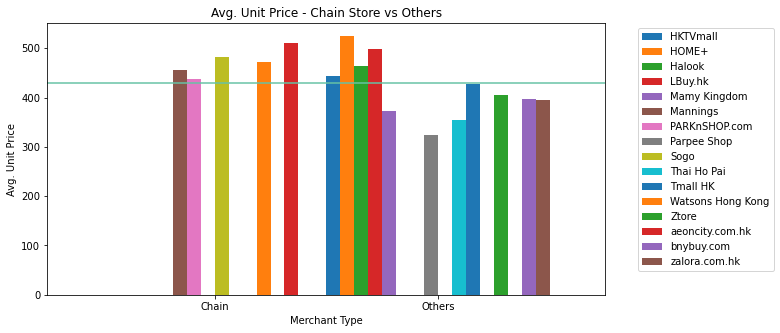

In [52]:
result.pivot_table(index='Merchant Type', columns='Merchant', values='Unit Price', aggfunc=np.mean).plot(kind='bar', figsize=(10,5), width=1, align='center').axhline(y=429.836)
plt.legend(bbox_to_anchor=(1.05, 1.0), loc='upper left')
plt.title('Avg. Unit Price - Chain Store vs Others')
plt.ylabel('Avg. Unit Price')
plt.xticks(rotation=0)
sns.set_palette(sns.color_palette("Set2"))
plt.savefig("./ChainStore.jpg", dpi=720, bbox_inches='tight')

In [53]:
# Visualization: Price range between Stages 1 - 4
t1=result.groupby('Stage').agg({'Unit Price': ['mean', 'max', 'min']}).round(2)
t1["Difference1"]=(result.groupby('Stage')['Unit Price'].max())-(result.groupby('Stage')['Unit Price'].min())
t1.head(5)

Unit Price               Difference1
            mean    max    min            
Stage                                     
1         481.47  589.0  285.0       304.0
2         440.38  559.0  315.0       244.0
3         422.73  499.0  295.0       204.0
4         347.29  405.0  285.0       120.0

In [55]:
# Visualization: Price range between Series
t2=result.groupby('Series').agg({'Unit Price': ['mean', 'max', 'min']}).round(2)
t2["Difference2"]=(result.groupby('Series')['Unit Price'].max())-(result.groupby('Series')['Unit Price'].min())
t2.head(5)

Unit Price                Difference2
              mean    max     min            
Series                                       
Atwo        483.19  538.0  384.75      153.25
HA          510.50  518.0  488.00       30.00
Luxa        389.75  538.0  285.00      253.00
Organic     499.31  589.0  429.90      159.10

<AxesSubplot:xlabel='Stage', ylabel='Unit Price'>

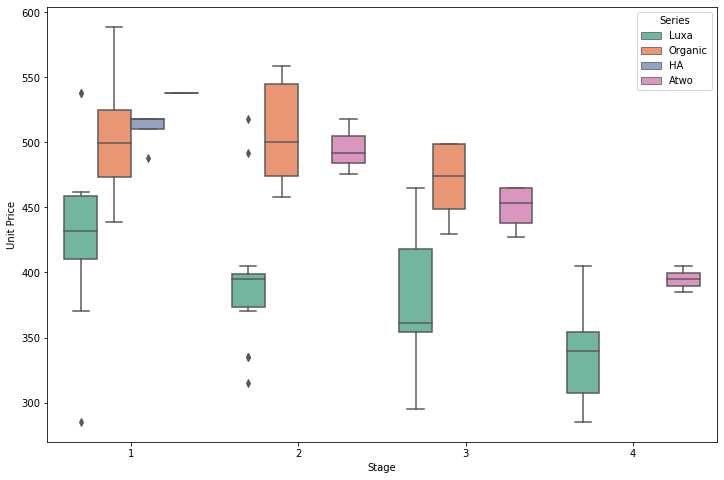

In [58]:
# Visualization: Distribution of Unit Price in terms of Stages & Series
get_ipython().run_line_magic('matplotlib', 'inline')
import matplotlib as mpl
mpl.rcParams['figure.figsize'] = [12, 8]
sns.boxplot(x="Stage", y="Unit Price", hue="Series",
                 data=result, palette="Set2")

In [59]:
# Visualization: Check if any insights from Parallel Import Perspective
t3=result.groupby('Parallel Import').agg({'Unit Price': ['mean', 'max', 'min']}).round(2)
t3.head(5)

Unit Price              
                      mean    max    min
Parallel Import                         
False               468.14  589.0  353.0
False               415.67  499.9  340.0
not stated          410.38  559.0  285.0